In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stores-area-and-sales-data/Stores.csv


# **Open file and import libraries**

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
stores = pd.read_csv("../input/stores-area-and-sales-data/Stores.csv", index_col='Store ID ')

# **Basic information abaut data set /Examine the data**

In [4]:
stores.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,,,,
1,1659,1961,530,66490
2,1461,1752,210,39820
3,1340,1609,720,54010
4,1451,1748,620,53730
5,1770,2111,450,46620


In [5]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 1 to 896
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 35.0 KB


In [6]:
print('Columns:')
for col in stores.columns:
    print(col)

Columns:
Store_Area
Items_Available
Daily_Customer_Count
Store_Sales


In [7]:
stores.describe().T

,count,mean,std,min,25%,50%,75%,max
Store_Area,896.0,1485.409598,250.237011,775.0,1316.75,1477.0,1653.50,2229.0
Items_Available,896.0,1782.035714,299.872053,932.0,1575.50,1773.5,1982.75,2667.0
Daily_Customer_Count,896.0,786.350446,265.389281,10.0,600.00,780.0,970.00,1560.0
Store_Sales,896.0,59351.305804,17190.741895,14920.0,46530.00,58605.0,71872.50,116320.0


In [8]:
#how many Nan values are in columns:
stores.isnull().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [9]:
stores['Sales_Rank']= stores['Store_Sales'].rank(ascending=False) #create Sales_Rank column
stores.sort_values(by='Sales_Rank', inplace=True)
stores.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Sales_Rank
Store ID,,,,,
650,1989,2414,860,116320,1.0
869,1775,2104,980,105150,2.0
433,1365,1638,680,102920,3.0
409,1303,1587,1310,102310,4.0
759,1486,1758,820,101820,5.0


# **Distributio**n

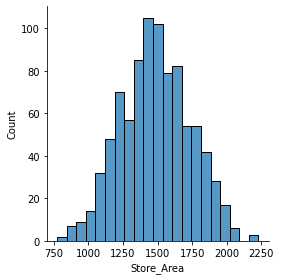

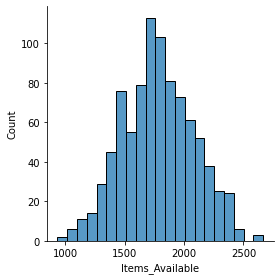

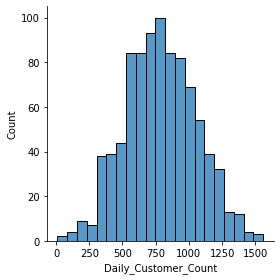

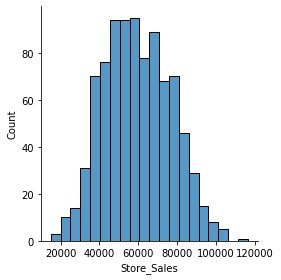

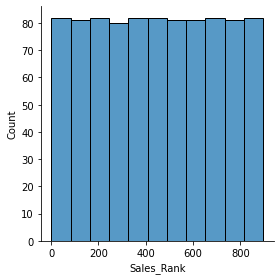

In [10]:
for col in stores.columns:
    sns.displot(stores[col], height=4)

# **Correlation**

Text(0.5, 1.0, 'Correlation')

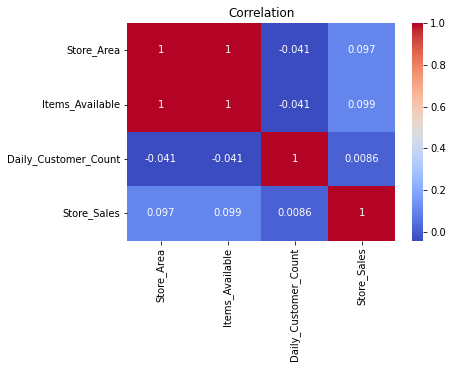

In [11]:
sns.heatmap(stores.iloc[:,:4].corr(),annot=True,cmap="coolwarm" )
plt.title('Correlation')

# **Visualization**

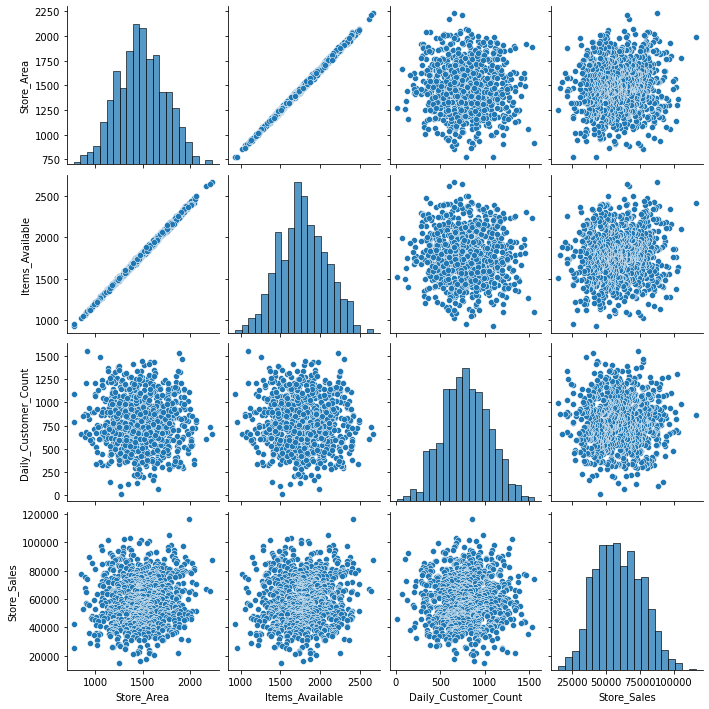

In [12]:
sns.pairplot(data=stores.iloc[:,:4])

<AxesSubplot:xlabel='Store_Area', ylabel='Sales_Rank'>

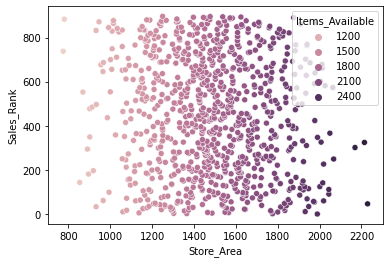

In [13]:
sns.scatterplot(x=stores.Store_Area, y = stores.Sales_Rank, hue=stores.Items_Available)

<AxesSubplot:xlabel='Store_Area', ylabel='Store_Sales'>

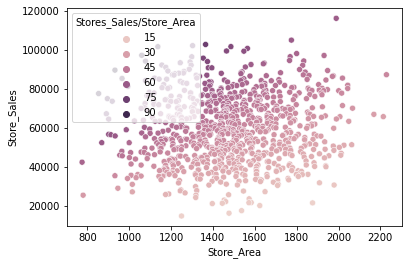

In [14]:
stores['Stores_Sales/Store_Area']=stores.Store_Sales// stores.Store_Area

sns.scatterplot(x=stores.Store_Area, y = stores.Store_Sales, hue=stores['Stores_Sales/Store_Area'])



<AxesSubplot:xlabel='Store_Area', ylabel='Store_Sales'>

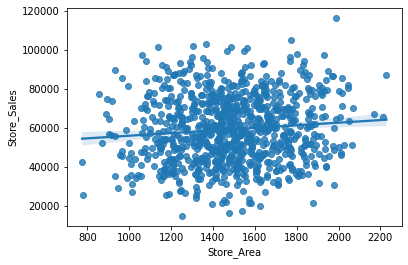

In [15]:
sns.regplot(x=stores.Store_Area, y = stores['Store_Sales'])

<AxesSubplot:xlabel='Sales_Rank', ylabel='Store_Area'>

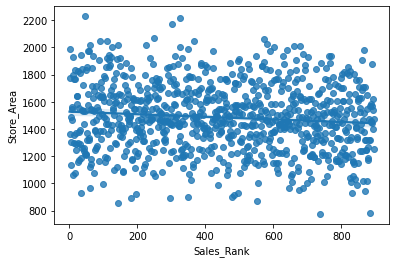

In [16]:
sns.regplot(x=stores.Sales_Rank, y = stores['Store_Area'])

<AxesSubplot:xlabel='Store ID '>

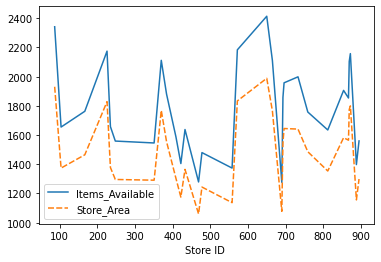

In [17]:
sns.lineplot(data=(stores[['Items_Available','Store_Area']]).head(30))

<AxesSubplot:title={'center':'First 30 stores'}, xlabel='Store ID '>

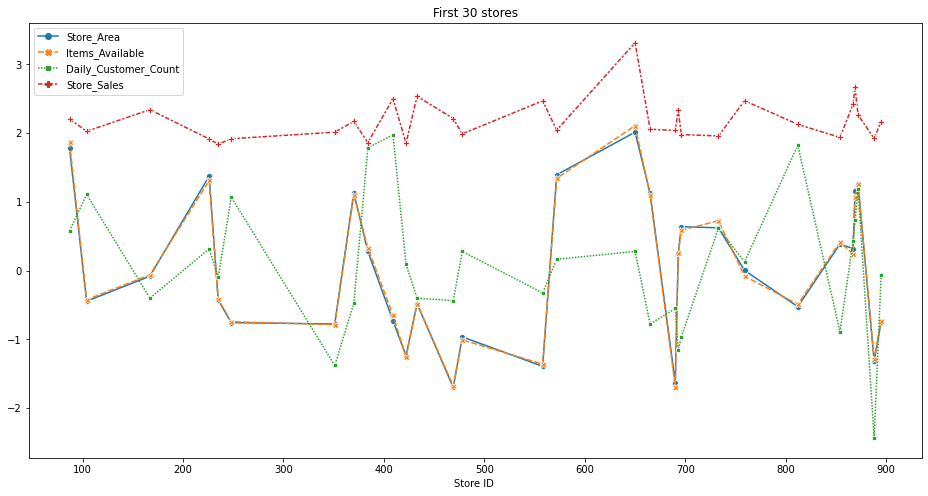

In [18]:
stores.sort_values(by = 'Store_Sales', ascending=False, inplace=True)
features=['Store_Area', 'Items_Available','Daily_Customer_Count','Store_Sales']
from sklearn.preprocessing import StandardScaler

# Set the width and height of the figure
plt.figure(figsize=(16,8))
# Add title
plt.title("First 30 stores")

#Standarization
ss = StandardScaler()
stores[features] = ss.fit_transform(stores[features])

sns.lineplot(data=stores[features].head(30),markers=True )

In [19]:
stores = pd.read_csv("../input/stores-area-and-sales-data/Stores.csv", index_col='Store ID ')

In [20]:
y = stores.Store_Sales
stores_features = ['Store_Area','Items_Available','Daily_Customer_Count']
X = stores.drop(['Store_Sales'], axis =1)


In [21]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
X_train, x_valid, y_train, y_valid = train_test_split(X, y, random_state=0, test_size=0.1)
model= XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(x_valid)


In [22]:
from sklearn.metrics import mean_absolute_error
MEA_XGBRegressor = mean_absolute_error(y_valid, pred)
MEA_XGBRegressor

14755.200802951389

In [23]:
from sklearn.tree import DecisionTreeRegressor

X_train, x_valid, y_train, y_valid = train_test_split(X, y, random_state=0, test_size =0.1)
model2= DecisionTreeRegressor()
model2.fit(X_train, y_train)
pred2 = model2.predict(x_valid)

In [24]:
MEA_decision_tree = mean_absolute_error(y_valid, pred2)
MEA_decision_tree

19018.555555555555

Simple conclusion: There is correlation between Store_Area and Items_Available. No correlation between store sales and store are, items available or daily customer count.